Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

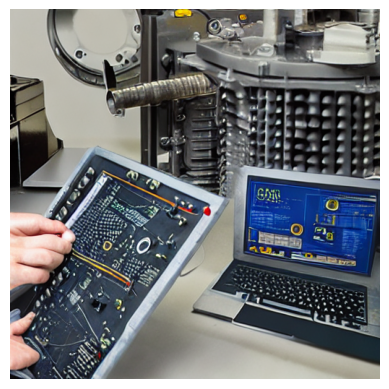

In [6]:


from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

model_id = "runwayml/stable-diffusion-v1-5"

# Load model without safetensors / fp16 issues
pipeline = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float32
)

device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline = pipeline.to(device)

# Generate image from text
def generate_image(prompt, steps=30, guidance_scale=7.5):
    image = pipeline(prompt, num_inference_steps=steps, guidance_scale=guidance_scale).images[0]
    return image

# Example usage
prompt = "Non destructive evaluation testing"
image = generate_image(prompt)

# ✅ Show result
plt.imshow(image)
plt.axis("off")
plt.show()

# Save the image
# image.save("fantasy_lion.png")


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

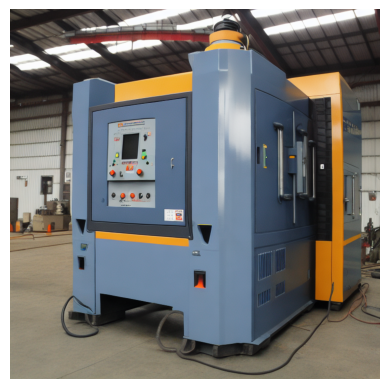

In [9]:


from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

model_id = "dreamlike-art/dreamlike-photoreal-2.0"

#  Load model without safetensors / fp16 issues
pipeline = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float32  # Use float32 for max compatibility
)

device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline = pipeline.to(device)

# Generate image from text
def generate_image(prompt, steps=30, guidance_scale=7.5):
    image = pipeline(prompt, num_inference_steps=steps, guidance_scale=guidance_scale).images[0]
    return image

# Example usage
prompt = "NDE ultrasonic testing machine"
image = generate_image(prompt)

plt.imshow(image)
plt.axis("off")
plt.show()



In [ ]:
# Multi-Model Text-to-Image Ensemble (Conceptual Best Output)


from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# multiple top models
model_ids = [
    "runwayml/stable-diffusion-v1-5",  # Base model
    "dreamlike-art/dreamlike-photoreal-2.0",  # High-quality photorealistic
    "SG161222/Realistic_Vision_V5.1_noVAE"  # Photorealistic faces & scenes
]

# Load all models (float32 for compatibility)
pipelines = []
for model_id in model_ids:
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32).to(device)
    pipelines.append(pipe)

# Generate image from all models and blend them
def generate_blended_image(prompt, steps=30, guidance_scale=7.5):
    images = []
    for pipe in pipelines:
        image = pipe(prompt, num_inference_steps=steps, guidance_scale=guidance_scale).images[0]
        images.append(image.convert("RGBA"))

    # Blend all images equally
    base = images[0]
    for img in images[1:]:
        base = Image.blend(base, img, alpha=0.5)

    return base

# Example prompt
prompt = "an astronaut playing guitar on the moon with earth in the background, ultra detailed"
image = generate_blended_image(prompt)

# Show image
plt.imshow(image)
plt.axis("off")
plt.show()

# Save result
# image.save("blended_output.png")
